**CLASIFICADOR DE IMAGENES PARA LA DETECCIÓN Y CLASIFICACIÓN DEL ALZHEIMER**

Con este modelo se pretende crear un clasificador de imágenes que sea capaz de detectar el alzheimer. Para ello, se hará uso de la librería Fast.ai.

Se ha utilizado el modelo ResNet50 para crear este modelo.

Se recomienda entrenarlo en Colab.

Dataset recuperado en: https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset

**Conectar con google drive**

In [1]:
import sys
def in_colab():
    "Check if the code is running in Google Colaboratory"
    return 'google.colab' in sys.modules

In [2]:
if in_colab():
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Instalación de dependencias**

In [3]:
if in_colab():
  !pip3 install --upgrade fastai > /dev/null

In [4]:
import fastai
import torch
f"fastai: {fastai.__version__}, pytorch: {torch.__version__}"

'fastai: 2.7.10, pytorch: 1.13.0+cu116'

**Importaciones**

In [5]:
from fastai.vision.all import *
from pathlib import Path
from fastai.vision.widgets import *
from tqdm.auto import tqdm
import shutil

**GPU setup**

La siguiente celda nos ayudará a asegurarnos que la GPU esté disponible:

In [6]:
assert torch.cuda.is_available(), "CUDA no es accesible!!!"


**OPTIONS**

Estudio del dataset, observo que las imagenes estan clasificadas por carpetas de test, train y val. Fast.ai ya hace la separación de train y val, por lo tanto, se reestructura el dataset según las especificaciones y se cambia el nombre de las imagenes.

In [7]:
IMAGE_PATH = Path('/content/drive/MyDrive/Imagenes Cerebro')
IMAGE_PATH.mkdir(parents=True, exist_ok=True)
IMAGES_FOR_MODEL = IMAGE_PATH / 'Imagenes modelo' 

In [8]:
IM_PATH_NonDemented = IMAGES_FOR_MODEL / 'NonDemented'
IM_PATH_NonDemented.mkdir(parents=True, exist_ok=True)
IM_PATH_MildDemented = IMAGES_FOR_MODEL / 'MildDemented'
IM_PATH_MildDemented.mkdir(parents=True, exist_ok=True)
IM_PATH_ModerateDemented = IMAGES_FOR_MODEL / 'ModerateDemented'
IM_PATH_ModerateDemented.mkdir(parents=True, exist_ok=True)
IM_PATH_VeryMildDemented = IMAGES_FOR_MODEL / 'VeryMildDemented'
IM_PATH_VeryMildDemented.mkdir(parents=True, exist_ok=True)

**La carpeta brain_test se utilizará para comprobar el modelo creado.**

In [9]:
brain_test = Path('/content/drive/MyDrive/brain_xray/test')
shutil.move(str(brain_test) , str(IMAGE_PATH))

'/content/drive/MyDrive/Imagenes Cerebro/test'

In [10]:
im_NonDemented_test = Path('/content/drive/MyDrive/Imagenes Cerebro/test/NonDemented')
im_ModerateDemented_test = Path('/content/drive/MyDrive/Imagenes Cerebro/test/ModerateDemented')
im_MildDemented_test = Path('/content/drive/MyDrive/Imagenes Cerebro/test/MildDemented')
im_VeryMildDemented_test = Path('/content/drive/MyDrive/Imagenes Cerebro/test/VeryMildDemented')

In [11]:
brain_val_NonDemented = Path('/content/drive/MyDrive/brain_xray/val/NonDemented')
brain_train_NonDemented =  Path('/content/drive/MyDrive/brain_xray/train/NonDemented')
brain_val_ModerateDemented = Path('/content/drive/MyDrive/brain_xray/val/ModerateDemented')
brain_train_ModerateDemented =  Path('/content/drive/MyDrive/brain_xray/train/ModerateDemented')
brain_val_MildDemented = Path('/content/drive/MyDrive/brain_xray/val/MildDemented')
brain_train_MildDemented =  Path('/content/drive/MyDrive/brain_xray/train/MildDemented')
brain_val_VeryMildDemented = Path('/content/drive/MyDrive/brain_xray/val/VeryMildDemented')
brain_train_VeryMildDemented =  Path('/content/drive/MyDrive/brain_xray/train/VeryMildDemented')

In [12]:
im_val_NonDemented = get_image_files(brain_val_NonDemented)
im_train_NonDemented = get_image_files(brain_train_NonDemented)
im_NonDemented = im_val_NonDemented + im_train_NonDemented

In [13]:
im_val_ModerateDemented = get_image_files(brain_val_ModerateDemented)
im_train_ModerateDemented = get_image_files(brain_train_ModerateDemented)
im_ModerateDemented = im_val_ModerateDemented + im_train_ModerateDemented

In [14]:
im_val_MildDemented = get_image_files(brain_val_MildDemented)
im_train_MildDemented = get_image_files(brain_train_MildDemented)
im_MildDemented = im_val_MildDemented + im_train_MildDemented

In [15]:
im_val_VeryMildDemented = get_image_files(brain_val_VeryMildDemented)
im_train_VeryMildDemented = get_image_files(brain_train_VeryMildDemented)
im_VeryMildDemented = im_val_VeryMildDemented + im_train_VeryMildDemented

In [16]:
for im in im_NonDemented:
  shutil.move(str(im),str(IM_PATH_NonDemented))
for im in im_ModerateDemented:
  shutil.move(str(im),str(IM_PATH_ModerateDemented))
for im in im_MildDemented:
  shutil.move(str(im),str(IM_PATH_MildDemented))
for im in im_VeryMildDemented:
  shutil.move(str(im),str(IM_PATH_VeryMildDemented))

**Se crea la carpeta donde se exportará el modelo**

In [17]:
modelo = Path('/content/drive/MyDrive/tfg/modelo')
#modelo.mkdir(parents=True, exist_ok=True)


**Cantidad de imágenes de imágenes**

In [18]:
print(f"Fotos de cerebro sanos: {len(im_NonDemented)}")
print(f"Fotos de cerebro con demencia moderada: {len(im_ModerateDemented)}")
print(f"Fotos de cerebro con demencia leve: {len(im_MildDemented)}")
print(f"Fotos de cerebro con demencia muy leve: {len(im_VeryMildDemented)}")
print(f"Fotos de cerebro sanos en test: {len(get_image_files(im_NonDemented_test))}")
print(f"Fotos de cerebro con demencia moderada en test: {len(get_image_files(im_ModerateDemented_test))}")
print(f"Fotos de cerebro con demencia leve en test: {len(get_image_files(im_MildDemented_test))}")
print(f"Fotos de cerebro con demencia muy leve en test: {len(get_image_files(im_VeryMildDemented_test))}")

Fotos de cerebro sanos: 8160
Fotos de cerebro con demencia moderada: 5504
Fotos de cerebro con demencia leve: 7616
Fotos de cerebro con demencia muy leve: 7626
Fotos de cerebro sanos en test: 1450
Fotos de cerebro con demencia moderada en test: 970
Fotos de cerebro con demencia leve en test: 1354
Fotos de cerebro con demencia muy leve en test: 1344


**Cambiar el nombre de las imagenes:**

In [19]:
l=get_image_files(IMAGE_PATH)

In [20]:
identificador = 0
for im in sorted(list(l)):
  nuevo_nombre = f"{im.parents[0]}/{str(identificador).zfill(5)}.jpg"
  identificador = identificador + 1
  os.rename(str(im), nuevo_nombre)


**MODEL OPTIONS**

In [21]:
BS = 20
EPOCHS = 20
WD = 1e-1
ITEM_IMAGE_SIZE = 224


**MODEL**

**Se empieza definiendo el modelo y las especificaciones que tendrá el dataset.**

In [22]:
brain = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items= get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y= parent_label,
    item_tfms=Resize(ITEM_IMAGE_SIZE)
    )

In [23]:
dls = brain.dataloaders(IMAGES_FOR_MODEL, bs=BS, wd=WD)
#len(dls.dataset)

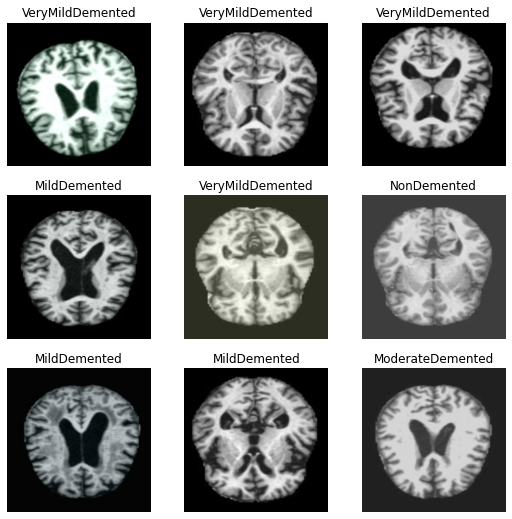

In [24]:
dls.show_batch()

**Se utiliza las redes neuronales convolucionales como extractoras de patrones.**

In [25]:
learn = vision_learner(dls, resnet50,
                    metrics=accuracy
                    )
                    #<- error_rate and accuracy are for single label classification problems
                    

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]


**Fine-tuning**

In [26]:
learn.fine_tune(EPOCHS)

epoch,train_loss,valid_loss,accuracy,time
0,0.869038,0.725769,0.674624,3:29:48


epoch,train_loss,valid_loss,accuracy,time
0,0.291185,0.215364,0.915413,05:14
1,0.168064,0.114954,0.957447,05:17
2,0.136691,0.095395,0.965231,05:17
3,0.111945,0.216728,0.927867,05:18
4,0.112704,0.051721,0.981664,05:18
5,0.075743,0.069145,0.975610,05:16
6,0.065916,0.049526,0.981318,05:17
7,0.067516,0.031951,0.989448,05:16
8,0.053678,0.053596,0.980280,05:16
9,0.047209,0.029648,0.989102,05:16


**INTERPRETACIÓN DE RESULTADOS**

In [27]:
interp= ClassificationInterpretation.from_learner(learn)

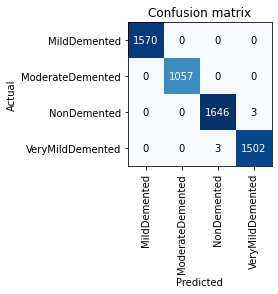

In [28]:

interp.plot_confusion_matrix()

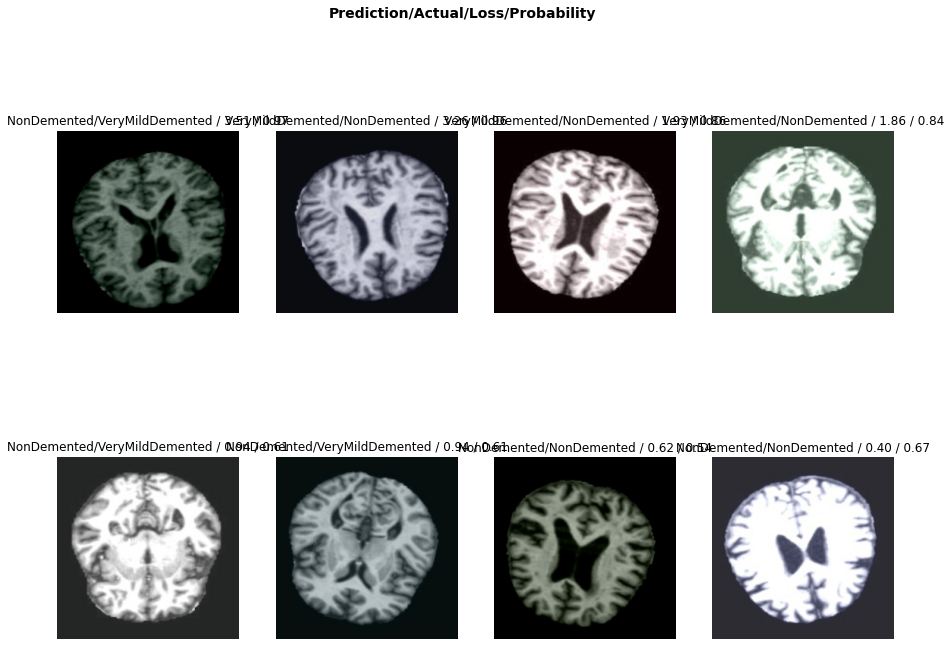

In [29]:

interp.plot_top_losses(8, figsize=(15,11))

**EXPORT**

In [30]:

learn.export(modelo/'ResNet50_modelo.pkl')